# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
!pip install xgboost


In [183]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [3]:
#reading data from the file
Visa = pd.read_csv("C:/Users/Cooldream/Downloads/Phython/EasyVisa.csv")

In [4]:
df = Visa.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
#Shape of Dataframe
Visa.shape

(25480, 12)

In [6]:
#Summary of Dataframe
Visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations**:

1. The data consists of 12 columns and 25480 rows.
2. The data has 3numerical columns with one as type (float) and 2 as type (int).
3. The data has 9  objects which means the presence of 9 'categorical' columns.
4. All the columns of database show 25480 non-null values which indicate no data is missing from any columns.

### Fixing the data types

In [7]:
#lets convert object to categorical columns to reduce the space
Visa.columns[Visa.dtypes=='object'] # select columns which are object 


Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
#lets convert object to categorical columns to reduce the space
for column in Visa.columns[Visa.dtypes=='object']:
    Visa[column] = Visa[column].astype('category')

In [9]:
Visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [10]:
# Statisitical summary of all the data
Visa.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**:

1. There are 4 unique values for "education_of_employee" with the majority of employee-applicants having done Bachelor's.
2. Atleast 14802 visa applicants have some job_experince.
3. Most applicants (22525 out of 25480) do not require any job training.
4. More than half of applicants (around 16861) are fron Asia
5. Oldest established company was established in 1800, while few companies are established in 2016 only.
6. The minimum prevailing wage of 2.1367 needs to be cross checked.
7. The mean prevailing wage is 74455.814 while median is 70308.21.
8. There are 4 unique values for "unit_of_wage" with the majority of employees being on yearly wages.
9. 22773 out of 25480 are full time positions.
10. Atleast 17018 visas out of 25480 were certified.
11. The data with negative no_of_employees need to be checked again. 
12. The mean value of no_of_employee is 5667 while median is 2109.


In [11]:
#First 5 rows
Visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
# last 5 rows
Visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [13]:
df=Visa.drop(['case_id'],axis=1)

In [14]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [15]:
# Null Values in Dataframe
df.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [16]:
# Duplicate Values in Dataframe
df.duplicated().sum()
print('Total number of duplicate values are:', df.duplicated().sum())

df.duplicated().value_counts()

Total number of duplicate values are: 0


False    25480
dtype: int64

**Observation**:

There are no duplicate or null values in the dataset.


### Unique values of all the categories

In [17]:
# list of all categorical columns
Objectdf = df.select_dtypes(include="category").columns.tolist()
Objectdf 

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [18]:
for column in Objectdf:
  print('Unique values of',column,':')
  #print(df[column] .unique())
  print(df[column].value_counts())
  print('..................'*5)

Unique values of continent :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
..........................................................................................
Unique values of education_of_employee :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
..........................................................................................
Unique values of has_job_experience :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
..........................................................................................
Unique values of requires_job_training :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
..........................................................................................
Unique values of region_of_employment :
Northeast    7195
South     

**Observations**:
    
1. The most employee for visa applications are from Asia (16861), Europe(3732) and North America (3292).
2. There are 3420 applicants with high school education only 
3. Atleast 2157 applicants are on hourly wages and 272 on weekly wages.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Univariate Analysis

### Plot the distribution plots for all the numerical features

In [19]:
#plot count 
def hist_box(data, column):
    
    #subplots of histogram and boxplot
    fig, (ax_hist, ax_box) = plt.subplots(2 , figsize = (13, 6), gridspec_kw={"height_ratios": (0.7, 0.3)})
    #plotting the title of graphs
    fig.suptitle(column)
    # plotting histogram 
    sns.histplot(data=data, x = column, ax=ax_hist, kde = True ) #plotting on first axis 
    
    #plotting mean line in histogram
    Mean=data[column].mean()
    ax_hist.axvline(x = Mean, color ='orange', linestyle="--") #plotting mean line on first axis
    
    #plotting Boxplot
    sns.boxplot(data = data, x=column, ax=ax_box, showfliers=True, color = 'yellow') #plotting on 2nd axis
    plt.show()

In [20]:
def bar_plot(data, column): 
    
    plt.figure(figsize = (5,3))  
    plt.title( column , loc = 'center', fontsize = 13) # Plot title on top of plot

    # plot the countplot for distribution 
    sns.countplot(data = df, x = column, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()
    
    print('************' *10)
    print(data[column].value_counts().head(6))


#### Observations on number of employees

#### Fixing the negative values in number of employees columns

In [21]:
#### Fixing the negative values in number of employees columns
df[df["no_of_employees"] < 0].head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.94,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.46,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.97,Hour,Y,Denied


In [22]:
df[df.no_of_employees<0].shape

(33, 11)

In [23]:
# absolute values for number of employees
df["no_of_employees"] = abs(df["no_of_employees"])

In [24]:
#no more negative values left
df[df.no_of_employees<0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


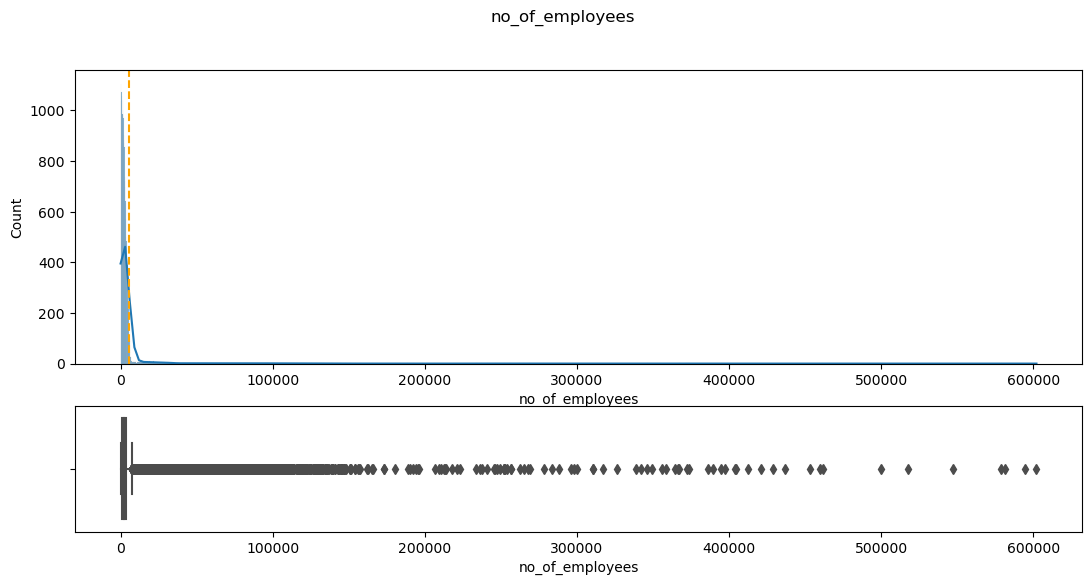

In [25]:
# plot for "no_of_employees"
hist_box(df, "no_of_employees")

**Observation**:

1. The distribution of companies by number of employee is heavily right skewed.
2. There are lot of outliers present on higher end distribution.

In [26]:
df4000 = df[df['no_of_employees'] < 4000]
df4000.shape

(20681, 11)

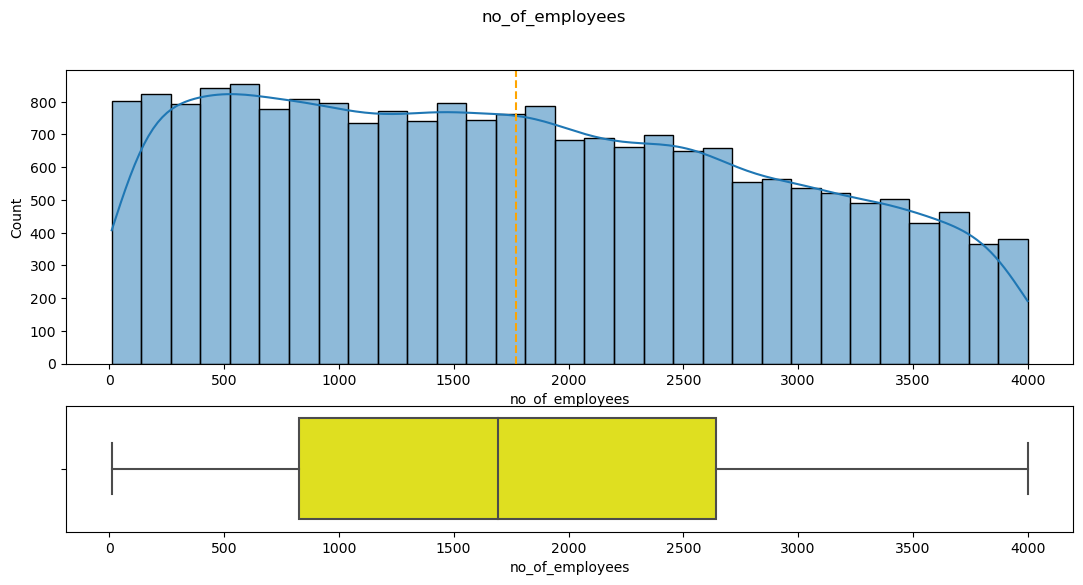

In [27]:
# plot for "no_of_employees"
hist_box(df4000, "no_of_employees")

**Observation**:

1. Atleast 20681 companies have employee below 4000.
2. The distribution of no of employees for less 4000 employees is slightly right skewed.

#### Observations on prevailing wage

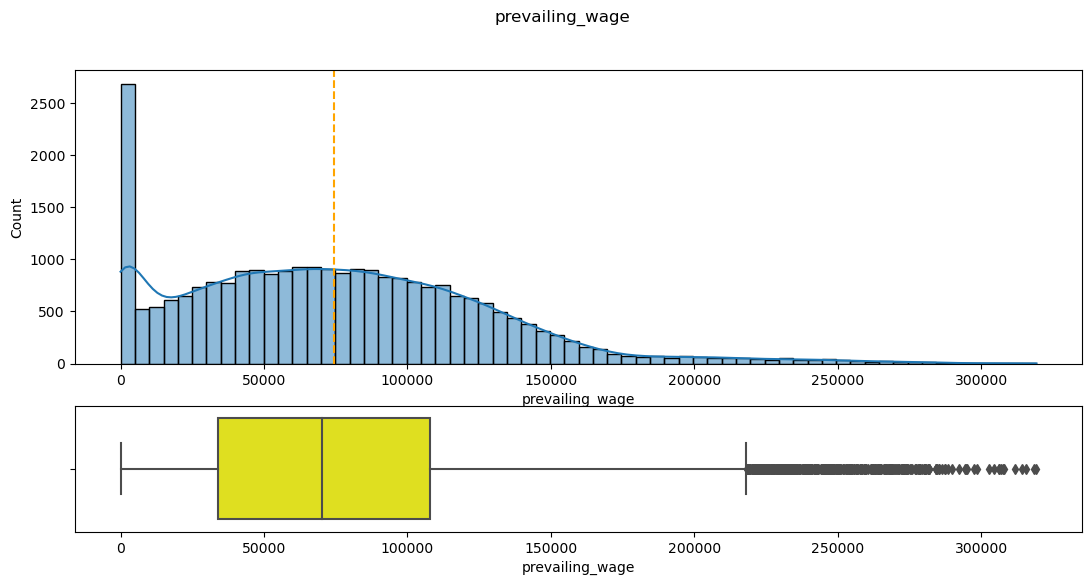

In [28]:
hist_box(df,'prevailing_wage')

In [29]:
#prevailing wage <5000
df5000 = df[df["prevailing_wage"] < 5000]
df5000.shape

(2682, 11)

**Observation**:
    
1. The distribution is rightly skewed.
2. There are outliers present on higher end.
3. There are around 2682 prevailing wages which is below 5000 so these wages might not be annual wages.

#### Observations on year of establishment 

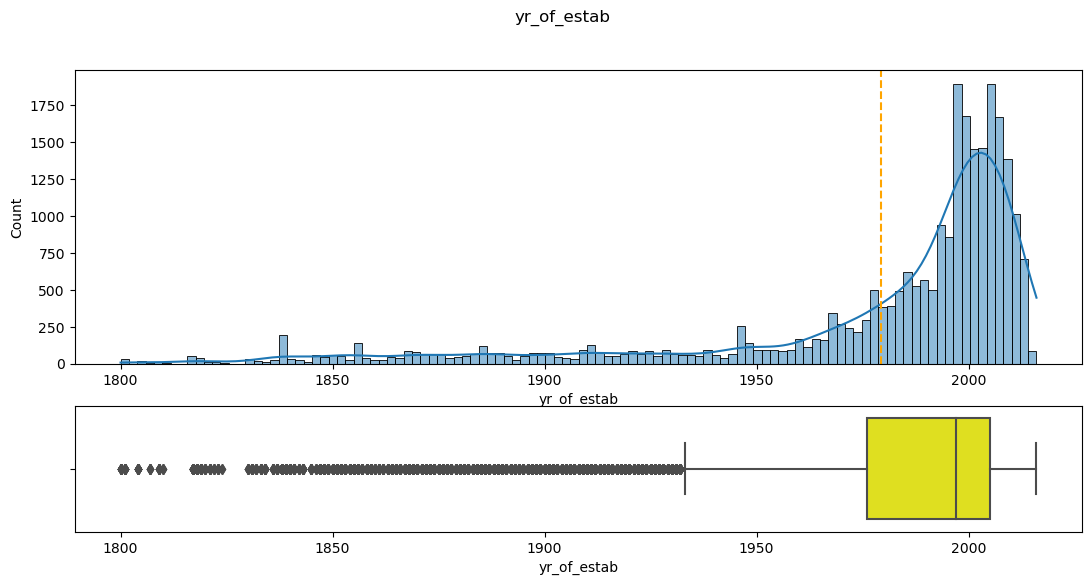

In [30]:
hist_box(df, 'yr_of_estab')

**Observation**:
    
1. The distribution is left skewed.
2. There are lot of outliers present on lower end of distribution.
3. As median is 1997, 50% of companies are established after year 1997.

### Plot the distribution for categoricals columns

#### Observations on continent

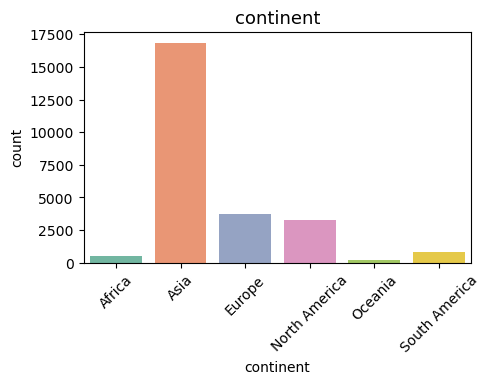

************************************************************************************************************************
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64


In [31]:
bar_plot(df, "continent") 

**Observations**:

1. More than 2/3 applicants 16861 in number are from Asian continent.
2. Least number of applicants (192) are from Oceania.
3. More than 95% applicant belong to three continents: Asia, Europe, North America

#### Observations on job experience

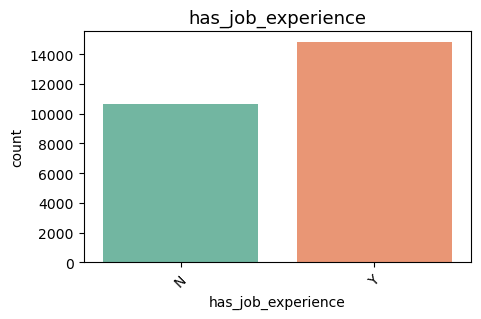

************************************************************************************************************************
Y    14802
N    10678
Name: has_job_experience, dtype: int64


In [32]:
bar_plot(df, 'has_job_experience')

**Observations**:
    
1. Around 14802 out of 25480 applicants has some job experience.
2. More than one third visa applicants do not have experience for the job.

#### Observations on job training

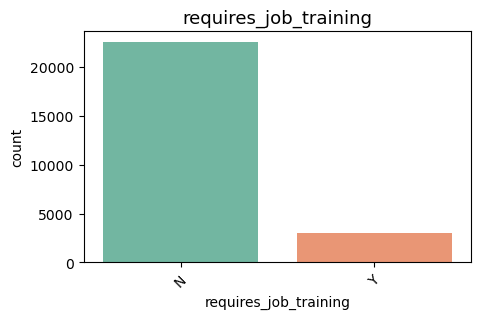

************************************************************************************************************************
N    22525
Y     2955
Name: requires_job_training, dtype: int64


In [33]:
bar_plot(df, 'requires_job_training')

Observations:

1. 22525 out of 25480 applicants does not require any job training. 
2. Around 11% of applicants do requires job training for the position.

#### Observations on region of employment

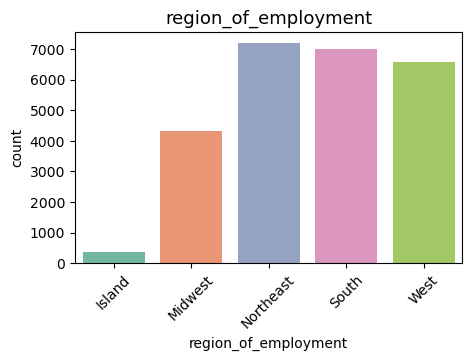

************************************************************************************************************************
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64


In [34]:
bar_plot(df, 'region_of_employment')

Observations:

1. Most of applications are from Northeast region.
2. Except Island all the regions shows high influx for visa applications.

Inference:

Higher influx of applications from Northeast, South, and West clearly indicates more companies in these area are 
facing labor shortage with respect to desired skill set. 

#### Observations on education of employee

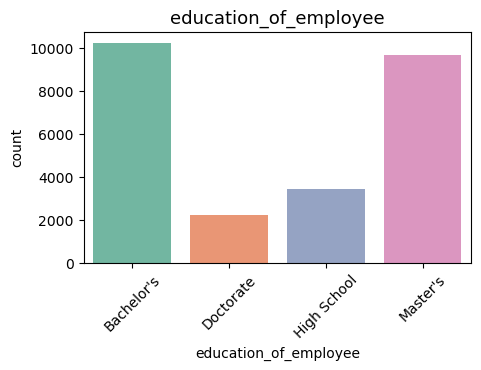

************************************************************************************************************************
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64


In [35]:
bar_plot(df, 'education_of_employee')

**Observations**:
    
1. Maximum number of applicants (10234 in number )have done Bachelor's.
2. More than 37% of applicants have done Master's.
3. There are higher applicants with High school diploma in comparison to Doctorate.

Inference:

We can infer that Doctrate degree holder are either not inclined to work in USA or labor market is not facing much labor shortage in required field. 

**Observations on full time position**

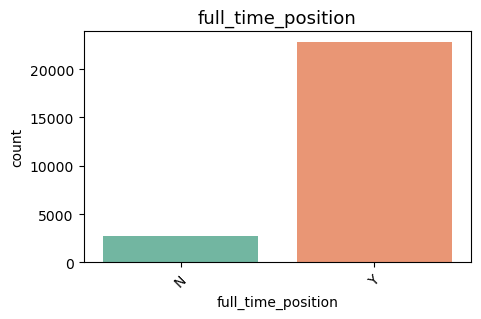

************************************************************************************************************************
Y    22773
N     2707
Name: full_time_position, dtype: int64


In [36]:
bar_plot(df, 'full_time_position')

**Observations**:
    
1. Around 88% of positions are full time positions
2. Only 2707 out of 25480 are part time positions.

#### Observations on case status

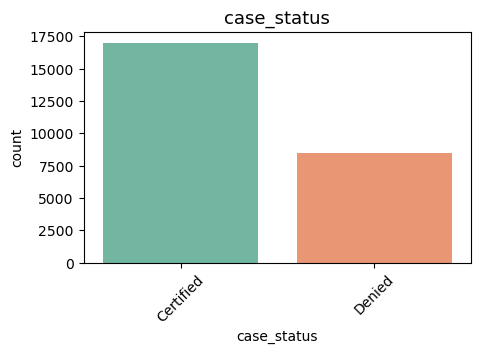

************************************************************************************************************************
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [37]:
bar_plot(df, 'case_status')

**Observations**:

 Atleast 67% cases (17018 ) are approved and 33% cases are denied. 

#### Observations on unit of wage

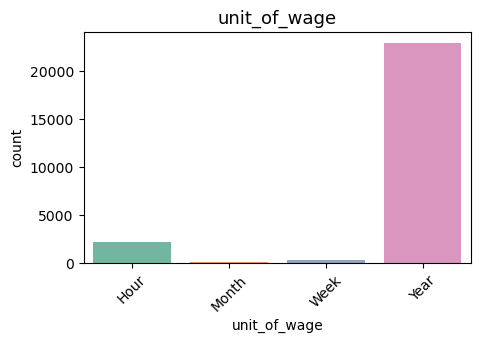

************************************************************************************************************************
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64


In [38]:
bar_plot(df, 'unit_of_wage')

**Observations**:
    
1. More than 90% of cases have yearly wages and 8% have hourly unit_of_wage.
2. Only 2% of total have weekly or monthly unit_of_wage.

### Bivariate Analysis

In [39]:
# function for stacked barplot 
def stack_barplot(data, column, target):
    tab = pd.crosstab(data[column], data[target], margins = True)
    print(tab)
    pd.crosstab(data[column], data[target], normalize="index").plot(kind="bar", figsize=(7, 4), stacked=True,  cmap='winter')
    #plt.title(, fontsize = 10)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45);

In [40]:
def boxplot(data, column, target):
    plt.figure(figsize=(15, 7))
    plt.subplot(121)
    plt.title( "column" , loc = 'center', fontsize = 13)
    sns.boxplot(data = df, x=column, y=target, palette = 'bright')
    plt.xticks(rotation=60)
    
    plt.subplot(122)
    sns.pointplot(data = df, x=column, y=target, palette = 'Set2')
    plt.show()


In [41]:
### function to plot distributions wrt target

def dist_plot_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers)")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


**Plot the correlation heatmap and pairplot**

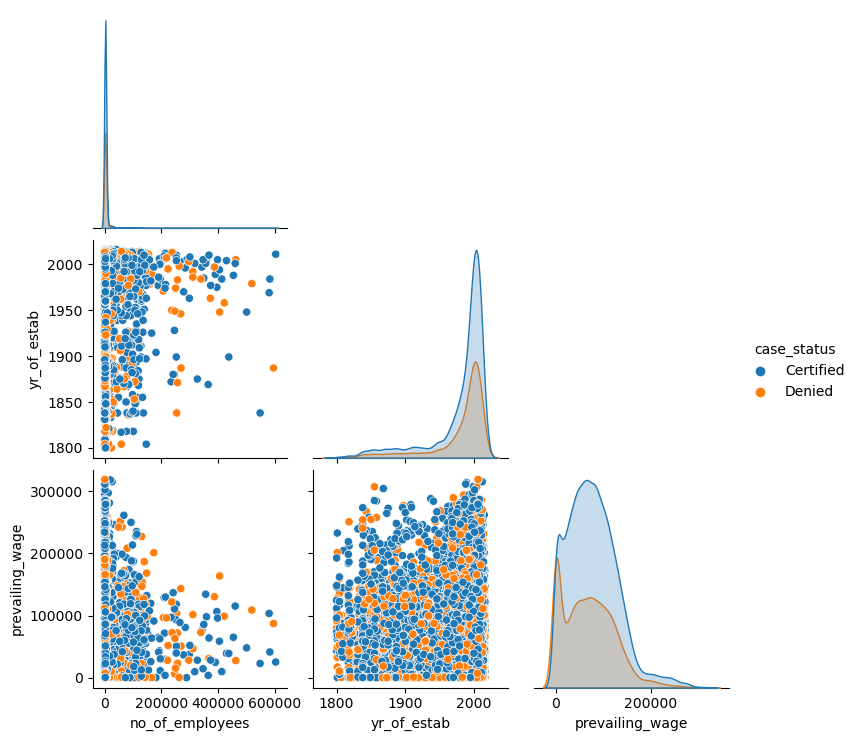

In [42]:
#lets plot numerical columns
sns.pairplot(data=df,  hue = 'case_status' , corner = 'True')

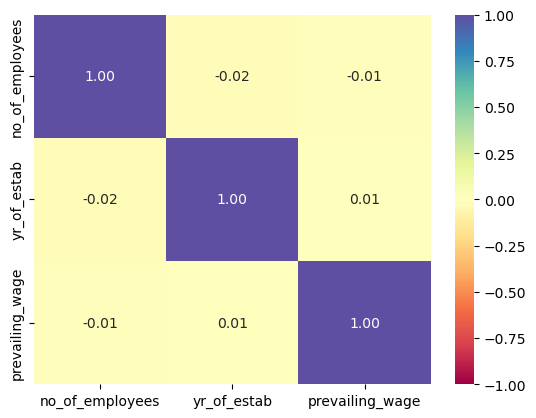

In [43]:
#calculate the correlation between the columns
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation**:
    
1. There are no visible patterns in different independent variables in pairplot. 
2. The heatmap for correlation clearly shows low correlation coefficients for most variables.

**Leading Questions**:

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

*******************************************************************************************************************************

### Higher education and visa certification

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
Bachelor's                  6367    3867  10234
Doctorate                   1912     280   2192
High School                 1164    2256   3420
Master's                    7575    2059   9634
All                        17018    8462  25480


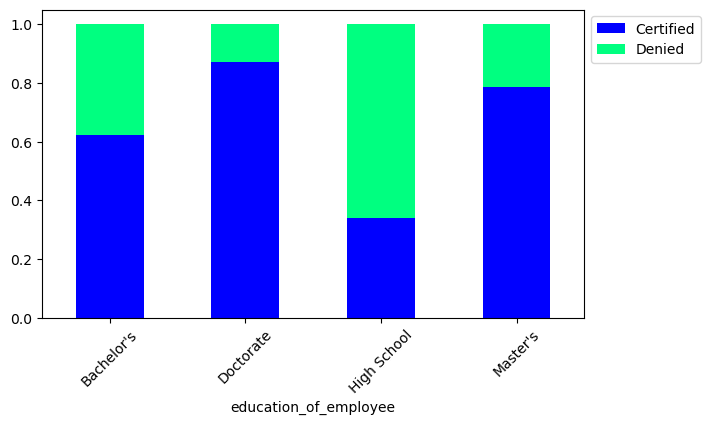

In [44]:
stack_barplot(df, "education_of_employee", "case_status")

**Observations**:
    
1. The ratio of certified case vs denied (.87 : .13) is highest for Doctorate degree.
2. The ratio of certified case vs denied (.33 : .67) is lowest for high school diploma holders.
3. The chances of Master's application approval is also high around 80%.

Inference:

The chances of applications being certified increases considerably with applicant's level of education. 

### Continents and visa certification

**2. How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
Africa               397     154    551
Asia               11012    5849  16861
Europe              2957     775   3732
North America       2037    1255   3292
Oceania              122      70    192
South America        493     359    852
All                17018    8462  25480


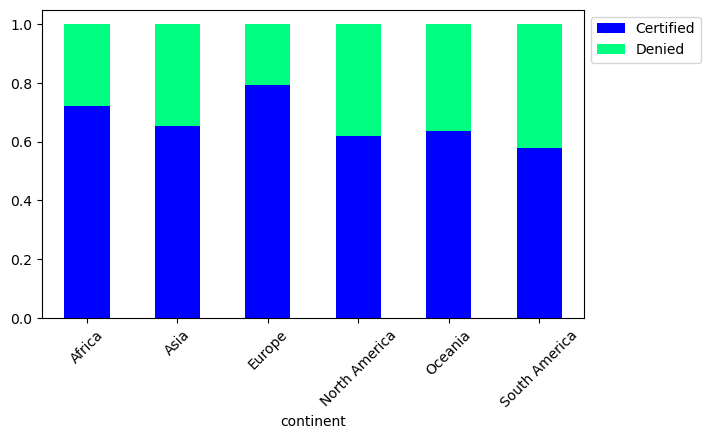

In [45]:
stack_barplot(df, "continent", "case_status")

**Observations**:
    
1. The highest chances of visa approval is 79% for European applicants.
2. The highest number of applicants are from Asia and chances of getting visa certified is approximately 65%.
3. The chance of getting certified is 60% for applicants of South America. 

### Work Experience vs Visa Status 

**3.Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
N                        5994    4684  10678
Y                       11024    3778  14802
All                     17018    8462  25480


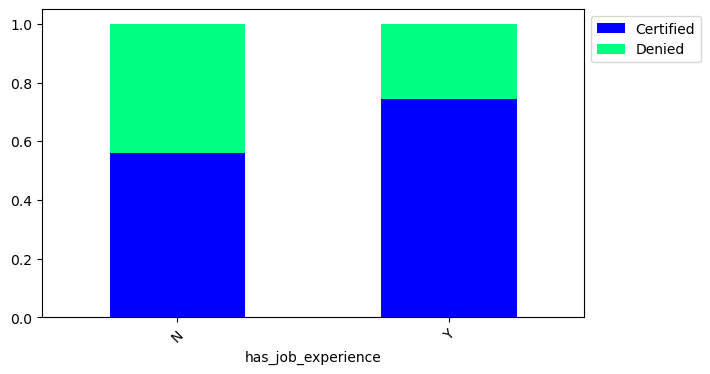

In [46]:
stack_barplot(df, "has_job_experience", "case_status")

**Observation**:
    
1. The chances of getting certified are highest around 75% if applicants have job experience.
2. The ratio of certified vs denied is approximately 3:1  with no experience applicants.


### Unit_of_wages vs Visa status

**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
Hour                747    1410   2157
Month                55      34     89
Week                169     103    272
Year              16047    6915  22962
All               17018    8462  25480


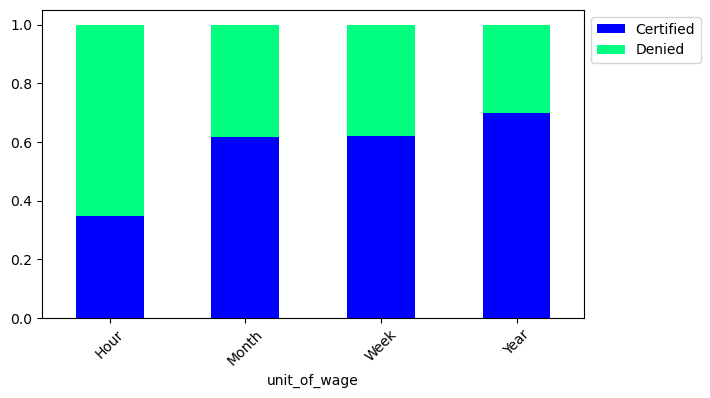

In [47]:
stack_barplot(df, "unit_of_wage", "case_status")

**Observations**:
    
1. The chances of applications denial are quite high (approximately 65%) for hourly wages.
2. The chances of application approval are similar around 60% for weekly or monthly wages.
3. The chances of approval are highest for yearly wages around 70%.

Inference:

The application approval is quite depended on unit_of_wage with respect to hourly and yearly wages.

### Educational Backgrounds vs region_of_employment	

#### Different regions have different requirements of talent having diverse educational backgrounds

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
Island                        129         25           60       161    375
Midwest                      1315        256          736      2000   4307
Northeast                    2874        656          905      2760   7195
South                        2991        541          934      2551   7017
West                         2925        714          785      2162   6586
All                         10234       2192         3420      9634  25480


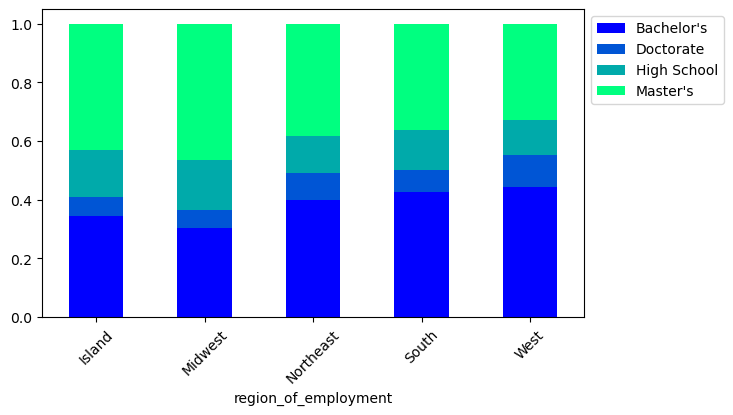

In [48]:
stack_barplot(df, "region_of_employment", "education_of_employee")

**Observations**:
    
1. The highest demand for Doctorates around 6.6% is for West region.
2. More than 75% of demands are for either Master's or Bachelor's for all of the regions.
3. The midwest and Island have higher high school applicants compared to other regions.

### Region of employment vs case status

**If visa status depends on region of employment?**

case_status               1     0    All
region_of_employment                    
Island                  226   149    375
Midwest                3253  1054   4307
Northeast              4526  2669   7195
South                  4913  2104   7017
West                   4100  2486   6586
All                   17018  8462  25480


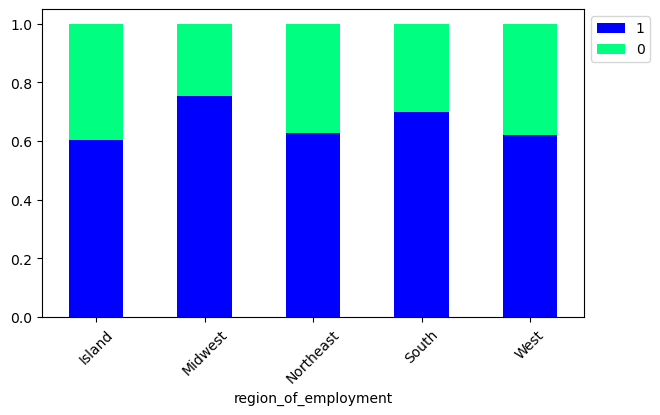

In [189]:
stack_barplot(df, "region_of_employment", "case_status")

**Observations**:
    
1. The influx of applications is little less in Midwest compared to Northeast, South and West.
2. The approval rate is higher upto 75% for Midwest incomparison to 60% of Northeast and West.

### Job_training vs case_status

**If approval of visa status depends on requirement of job training of employee?**

case_status                1     0    All
requires_job_training                    
N                      15012  7513  22525
Y                       2006   949   2955
All                    17018  8462  25480


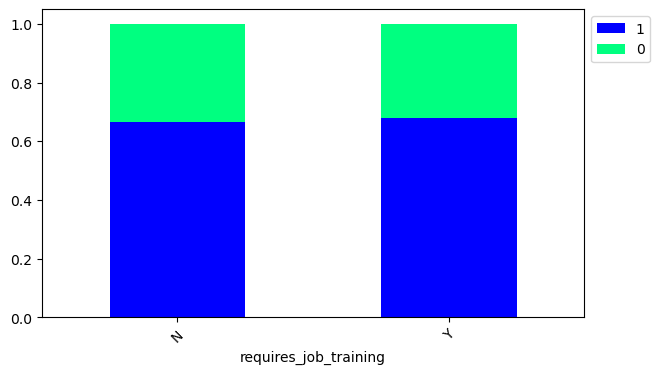

In [191]:
stack_barplot(df, "requires_job_training" , "case_status")

**Observation**:
    
1. The requirement of job training surprisingly does not impact the visa approval chances.

### Job_experience vs Job_training

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
N                       8988  1690  10678
Y                      13537  1265  14802
All                    22525  2955  25480


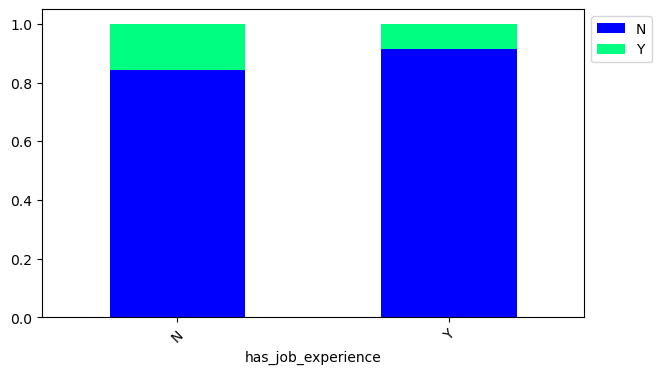

In [49]:
stack_barplot(df, "has_job_experience", "requires_job_training")

r**Observations**:
    
1. There is 84% chance of that applicants does not require job training with no experience. 
2. There is 91% chance that applicants does not require job training who have prior experience.

### Prevailing wages vs case status

**5.The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

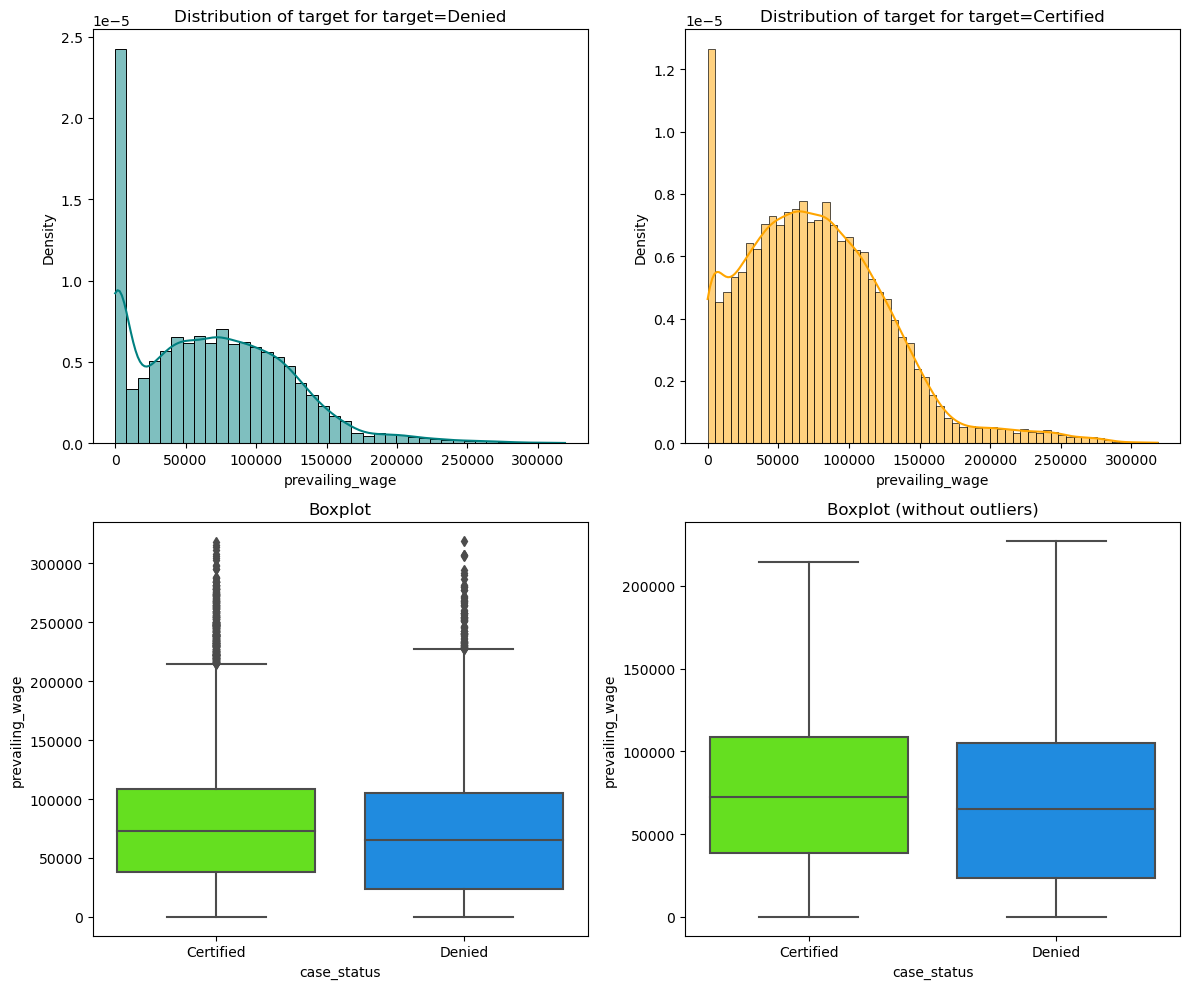

In [50]:
dist_plot_target(df, "prevailing_wage", "case_status")

**Observations**:
    
1. The lower prevailing wages have high chances of visa denial, and 25% of visa denial is below $35000.
2. With or without ourliers, the median prevailing wage for denied application is lower than certified.
3. The spike at 0 in both graphs is probably refer to hourly wages. 
4. The distribution of certified and denied is widely distributed and right skewed.

Inference:

Though prevailing wages below $35000 might increase chance of denial, but overall chance of approval of application is not much effected by prevailing wages. 

### Number of employees and case status

**If Visa status depends on number of empolyee of the company ?**

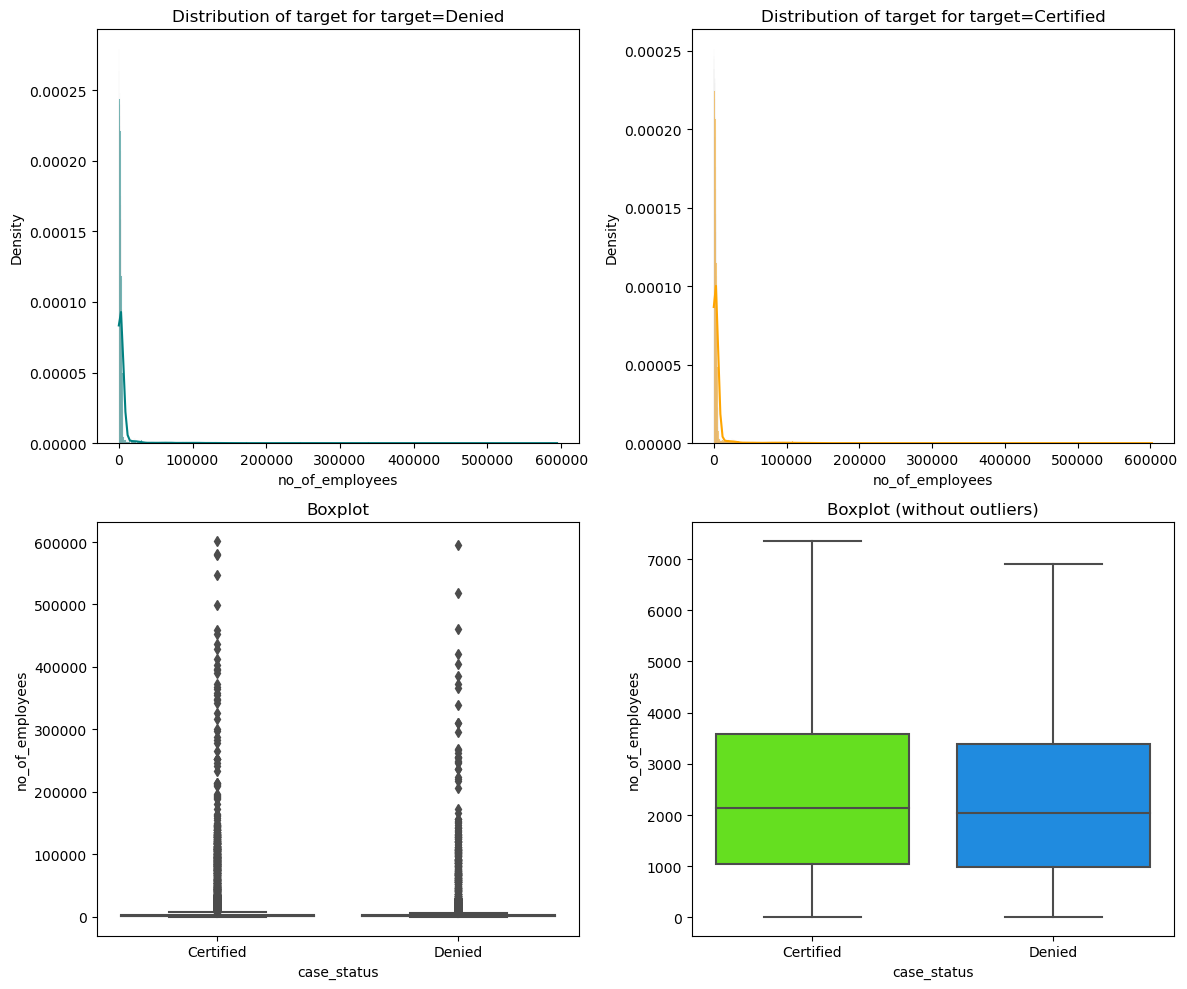

In [51]:
dist_plot_target(df, "no_of_employees", "case_status")

**Observations**:
    
1. Maximum companies have employees less than $8000 but maximum employee are upto 600K for companies with both approved or denied 
application.
2. Both the curves are heavily rightly skewed
3. There are too many outliers in the distributions of both visa status.
4. Due to presence of heavy outliers, the distribution of both visa status looks similar.
5. The boxplot without outliers shows that the distribution of certified has little wider range than denied.

Inference:
    
No of employee in company has not much influence on approval or denial of application 

### Year of establishment  and case status

**If Visa status depends on the age of company**?

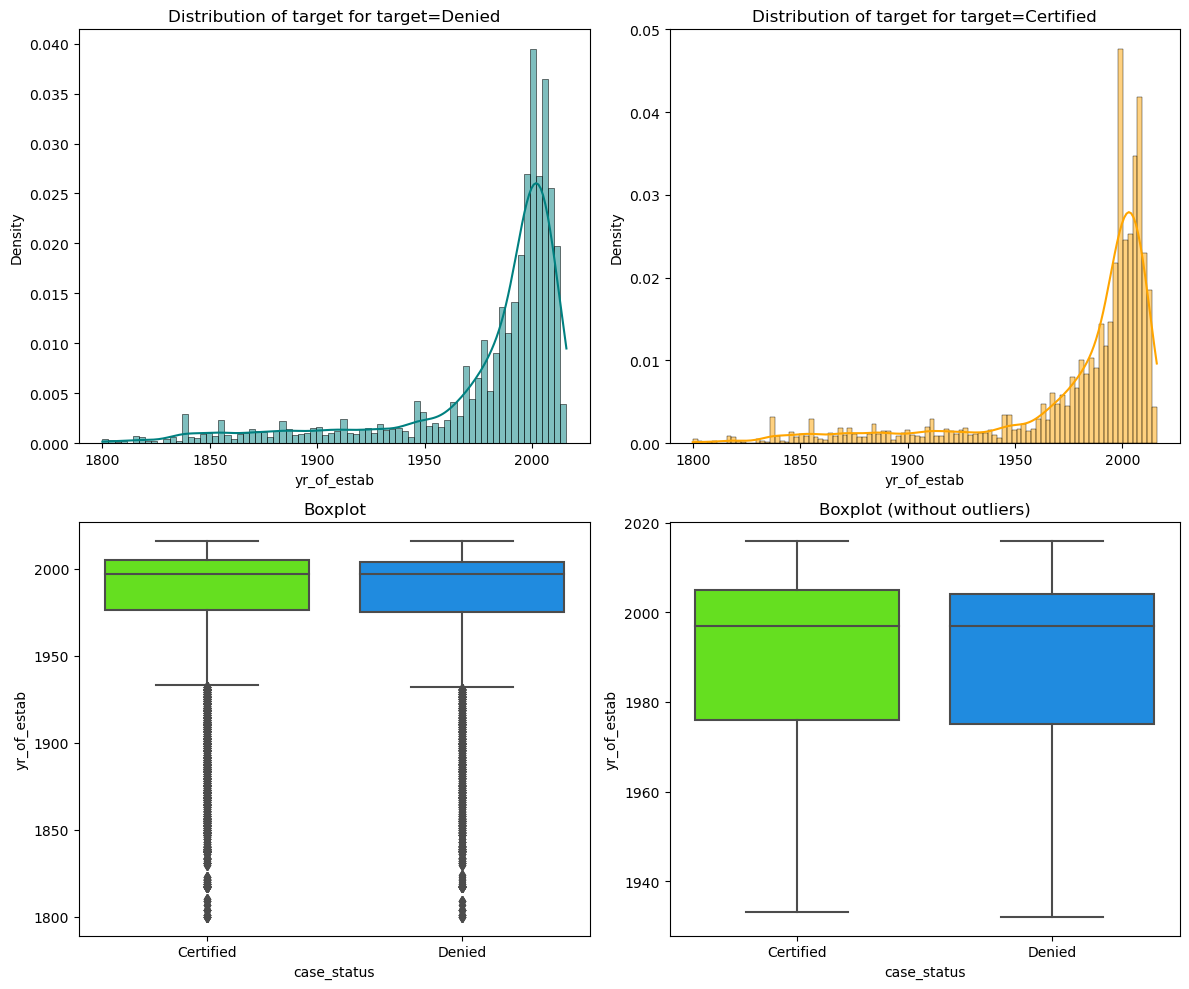

In [52]:
dist_plot_target(df, "yr_of_estab", "case_status")

**Observations**:
    
1. Both the distributions are heavily left skewed.
2. There are lot of outliers presend on lower end of distribution.
3. More than 50% of companies are established after 1997 for both certified and denied applications.
4. Overall distribution of certified and denied application are similar with respect to year of establishment of companies

### Prevailing wages vs Unit_of_wage'

**Correlation between prevailing wages and unit_of_wages**

In [53]:
#Calculating min median and mean prevailing wage
print ("Mean:" , df.groupby(['unit_of_wage']).prevailing_wage.mean())
print ('********' * 10)

print ("Min:" ,df.groupby(['unit_of_wage']).prevailing_wage.min())
print ('********' * 10)

print ("Median:" ,df.groupby(['unit_of_wage']).prevailing_wage.median())
print ('********' * 10)

Mean: unit_of_wage
Hour       414.570513
Month    87592.864045
Week     85606.820515
Year     81228.077133
Name: prevailing_wage, dtype: float64
********************************************************************************
Min: unit_of_wage
Hour        2.1367
Month    1599.2800
Week     2183.2300
Year      100.0000
Name: prevailing_wage, dtype: float64
********************************************************************************
Median: unit_of_wage
Hour       372.6523
Month    81826.0100
Week     85075.8200
Year     76174.5000
Name: prevailing_wage, dtype: float64
********************************************************************************


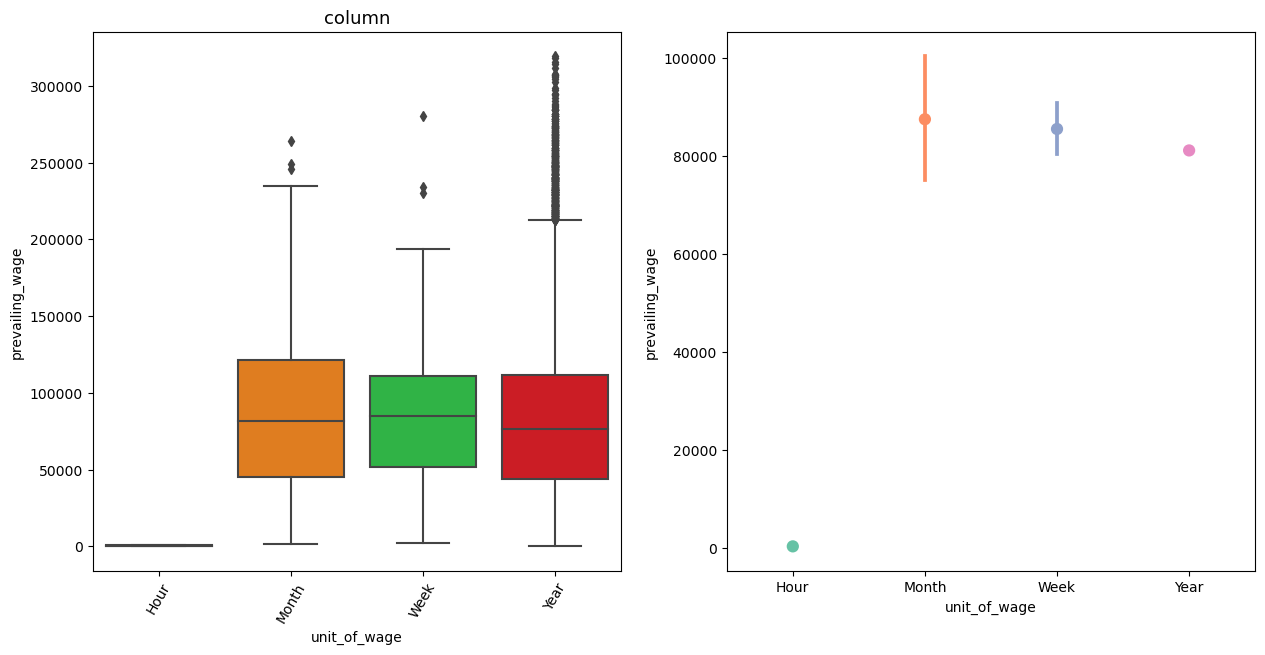

In [54]:
boxplot(df, 'unit_of_wage', 'prevailing_wage')

**Observations**:
    
1. Though unit_of_wage is "Year" yet prevailing wage is around $100 which seems unrealistic yearly wage.
2. The mean and median (monthly ,weekly) wages clearly are higher than mean and median of yearly wages.
3. The boxplot clearly shows apart from Hourly wages, rest all (weekly monthly) are annual wages in database.
4. The confidence interval of weekly and monthly wages from pointplot clearly indicate most of prevailing wages are cumulative annual wages.

In [55]:
# Histogram for database when for annual wages
dfyear = df[df["unit_of_wage"] == 'Year']
dfyear.shape

(22962, 11)

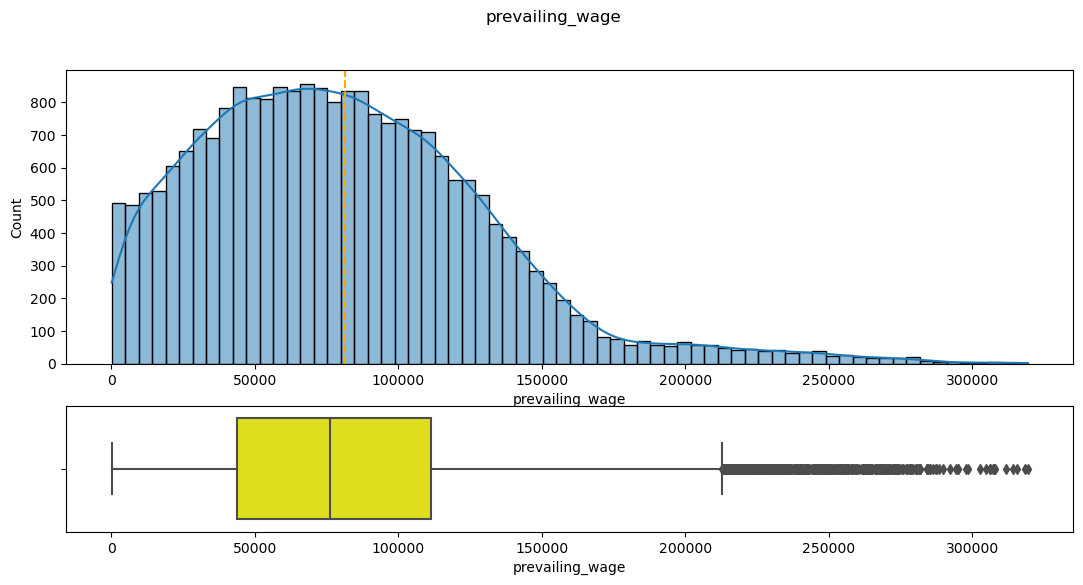

In [56]:
#lets plot annual prevailing wage
hist_box(dfyear,'prevailing_wage')

**Observation**:
    
1. The distribution is rightly skewed.
2. There are outliers present on higher end.
3. The median annual prevailing_wage is around 76174.5 and less than mean value of 81228.07.
4. Though unit_of_wage is 'Year' yet prevailing wage is around 100 which seems unrealistic value.

In [57]:
dfHour = df[df["unit_of_wage"] == 'Hour']

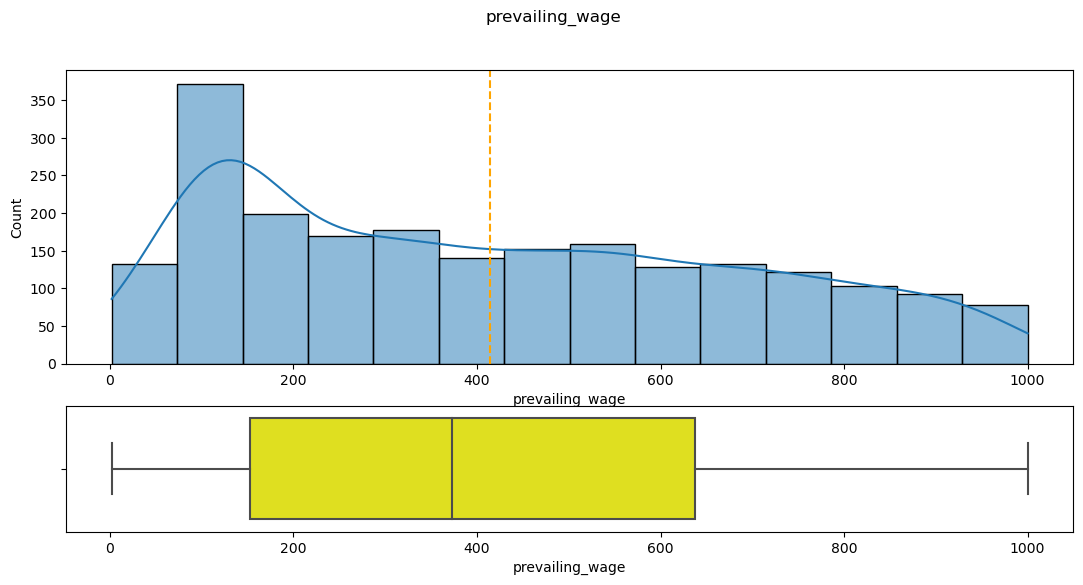

In [58]:
hist_box(dfHour,'prevailing_wage')

**Observation**:

1. This distribution is rightly skewed as well.
2. There are no outliers present.
3. The mean hourly wage of around $420 which seems improbable hourly prevailing wage probably billing rate is hourly but paid weekly or monthly.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

**Dataset has no missing data or duplicated values** 

### Outlier Check


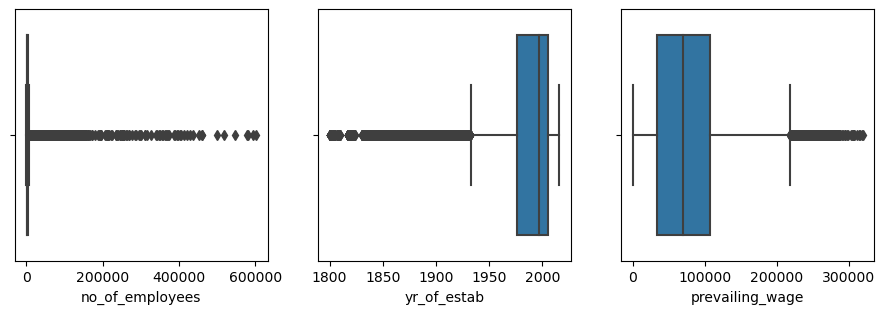

In [59]:
# outlier detection using boxplot

Num_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 15))

for i, variable in enumerate(Num_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)

plt.show()


**Observation**:

1. There are outliers in the data.
2. As bagging and boosting can handle outliers, we will not treat them.

### Feature Engineering

 **Lets Divide unit_of_wages into 2 major group into new column Wages**

Lets divide unit of wages into 2 groups 

1. prevailing_wage < 1000: Hourly 
2. prevailing_wage > 1000: Annually

______________________________________________________________________________________________________________________________

In [61]:
#prevailing wage <1000
df1000 = df[df["prevailing_wage"] < 1000]
#df.loc[df["prevailing_wage"] < 1000, 'unit_of_wage'=='Month'].count()
df1000['unit_of_wage'].value_counts()


Hour     2157
Year      110
Month       0
Week        0
Name: unit_of_wage, dtype: int64

In [62]:
#Fuction to create new column wage based on 2 parameters Hour or Year wages
def Wages(s):
    if s < 1000:
        return "Hourly"
    else:
        return "Annually"

In [63]:
df['wages']=df['prevailing_wage'].apply(Wages)

In [64]:
df['wages'].value_counts()

Annually    23213
Hourly       2267
Name: wages, dtype: int64

**Observation**:
    
1. As clear from bivariate analysis monthly and weekly unit_of_wages can be included with Annual wages.
2. The Hourly wages will include all the values of Hour and Year if prevaling wages <1000.

**Lets cut no_of_employee into different subgroups** 


Companies will be divided into 4 subgroups according to their employees number in new column - **Company_Size**
1. 0-1000  - Small
2. 1000-2000 - Medium
3. 2000-35000 - Large
4. 35000-np.inf - Big
___________________________________________________________________________________________________________________________

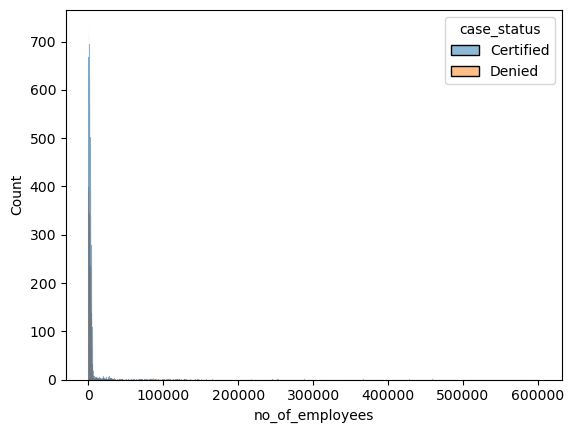

In [65]:
sns.histplot(data=df, x='no_of_employees', hue='case_status');

In [66]:
#lets cut no_of_employee into different subgroups
bins = [0,1000, 2000,35000, np.inf ]
Size=['Small','medium','large','Big']
df["Company_Size"] = pd.cut( df["no_of_employees"], bins, labels = Size)

**Lets cut year_of_estblishment into different subgroups** 

Companie will be divided into 4 subgroups according to their established age in new column - **Company_Age**

1. 1800-1976 - V_Old
2. 1976-1997 - Old
3. 1997-2005 - New
4. 2005-np.inf - Recent

_____________________________________________________________________________________________________________________________

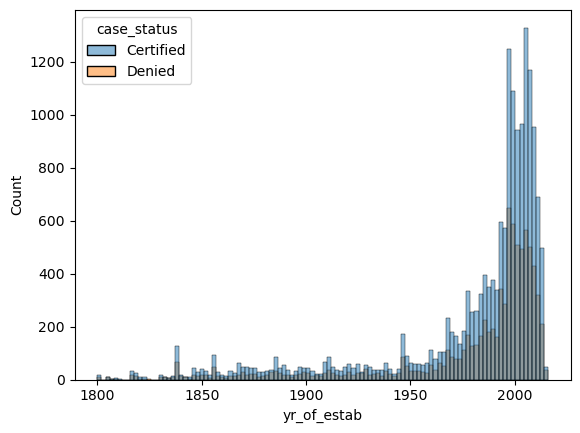

In [67]:
sns.histplot(data=df, x='yr_of_estab', hue='case_status');

In [68]:
#lets cut no_of_employee into different subgroups
bins = [1800, 1976, 1997, 2005, np.inf ]
Age=['V_Old','Old','New','Recent']
df["Company_Age"] = pd.cut( df["yr_of_estab"], bins, labels = Age)

In [69]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wages,Company_Size,Company_Age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,Hourly,large,Recent
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,Annually,large,New
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,Annually,Big,Recent
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,Annually,Small,V_Old
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,Annually,medium,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,Annually,large,Recent
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,Annually,large,Recent
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,Annually,medium,V_Old
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,Annually,medium,V_Old


## EDA

- It is a good idea to explore the data once again after manipulating it.

### Company_size and case status

case_status   Certified  Denied    All
Company_Size                          
Small              4108    2133   6241
medium             3878    2037   5915
large              8559    4088  12647
Big                 473     204    677
All               17018    8462  25480


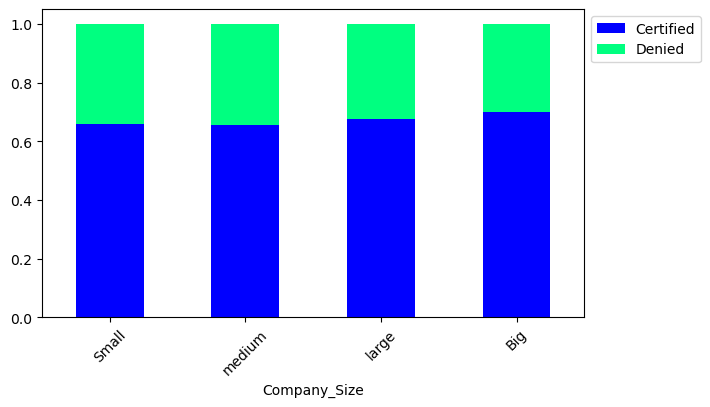

In [70]:
stack_barplot(df, "Company_Size", "case_status")

**Observation**:
    
1. As similar to previous obervation size of company and employee has not much impact on approval or denial of visa application
2. There is slightly increase increase in probablity of approval for Big companies compared to others.

### Company_Age and case status

case_status  Certified  Denied    All
Company_Age                          
V_Old             4278    2178   6456
Old               4309    2226   6535
New               4451    2322   6773
Recent            3969    1731   5700
All              17007    8457  25464


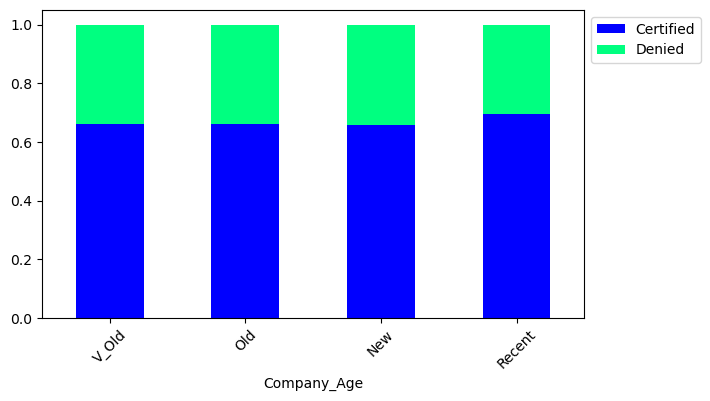

In [71]:
stack_barplot(df, "Company_Age", "case_status")

**Observation**:

1. As similar to previous obervation age of company and employee has not much impact on visa application.
2. The recent companies slightly higher chance of visa approval than other companies.

**Case Status certified as 1 and cancelled as 0 to predict future cancellation**

In [72]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [73]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wages,Company_Size,Company_Age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0,Hourly,large,Recent
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1,Annually,large,New
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0,Annually,Big,Recent
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0,Annually,Small,V_Old
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1,Annually,medium,New


In [74]:
#lets drop unit_of_wages, yr_of_estab, no_of_employee 
visa_df = df.drop(['yr_of_estab','no_of_employees', 'unit_of_wage'], axis=1)

In [75]:
visa_df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,prevailing_wage,full_time_position,case_status,wages,Company_Size,Company_Age
0,Asia,High School,N,N,West,592.2029,Y,0,Hourly,large,Recent
1,Asia,Master's,Y,N,Northeast,83425.6500,Y,1,Annually,large,New
2,Asia,Bachelor's,N,Y,West,122996.8600,Y,0,Annually,Big,Recent
3,Asia,Bachelor's,N,N,West,83434.0300,Y,0,Annually,Small,V_Old
4,Africa,Master's,Y,N,South,149907.3900,Y,1,Annually,medium,New


## Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

### Creating training and test sets 

In [76]:
# specifying the independent  and dependent variables
X = visa_df.drop(["case_status"], axis=1)
Y = visa_df["case_status"]


# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1,  stratify=Y)

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   prevailing_wage                    25480 non-null  float64
 1   continent_Asia                     25480 non-null  uint8  
 2   continent_Europe                   25480 non-null  uint8  
 3   continent_North America            25480 non-null  uint8  
 4   continent_Oceania                  25480 non-null  uint8  
 5   continent_South America            25480 non-null  uint8  
 6   education_of_employee_Doctorate    25480 non-null  uint8  
 7   education_of_employee_High School  25480 non-null  uint8  
 8   education_of_employee_Master's     25480 non-null  uint8  
 9   has_job_experience_Y               25480 non-null  uint8  
 10  requires_job_training_Y            25480 non-null  uint8  
 11  region_of_employment_Midwest       25480 non-null  uin

In [78]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 23)
Shape of test set :  (7644, 23)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


**Observation**;

1. The data (train and test) has split in ratio of 67 to 33 ratio for certified vs denied due to stratify.
2. All the data types of X is converted to numerical columns.

### EDA

To check correlation of newly created dummy variables 

<Axes: >

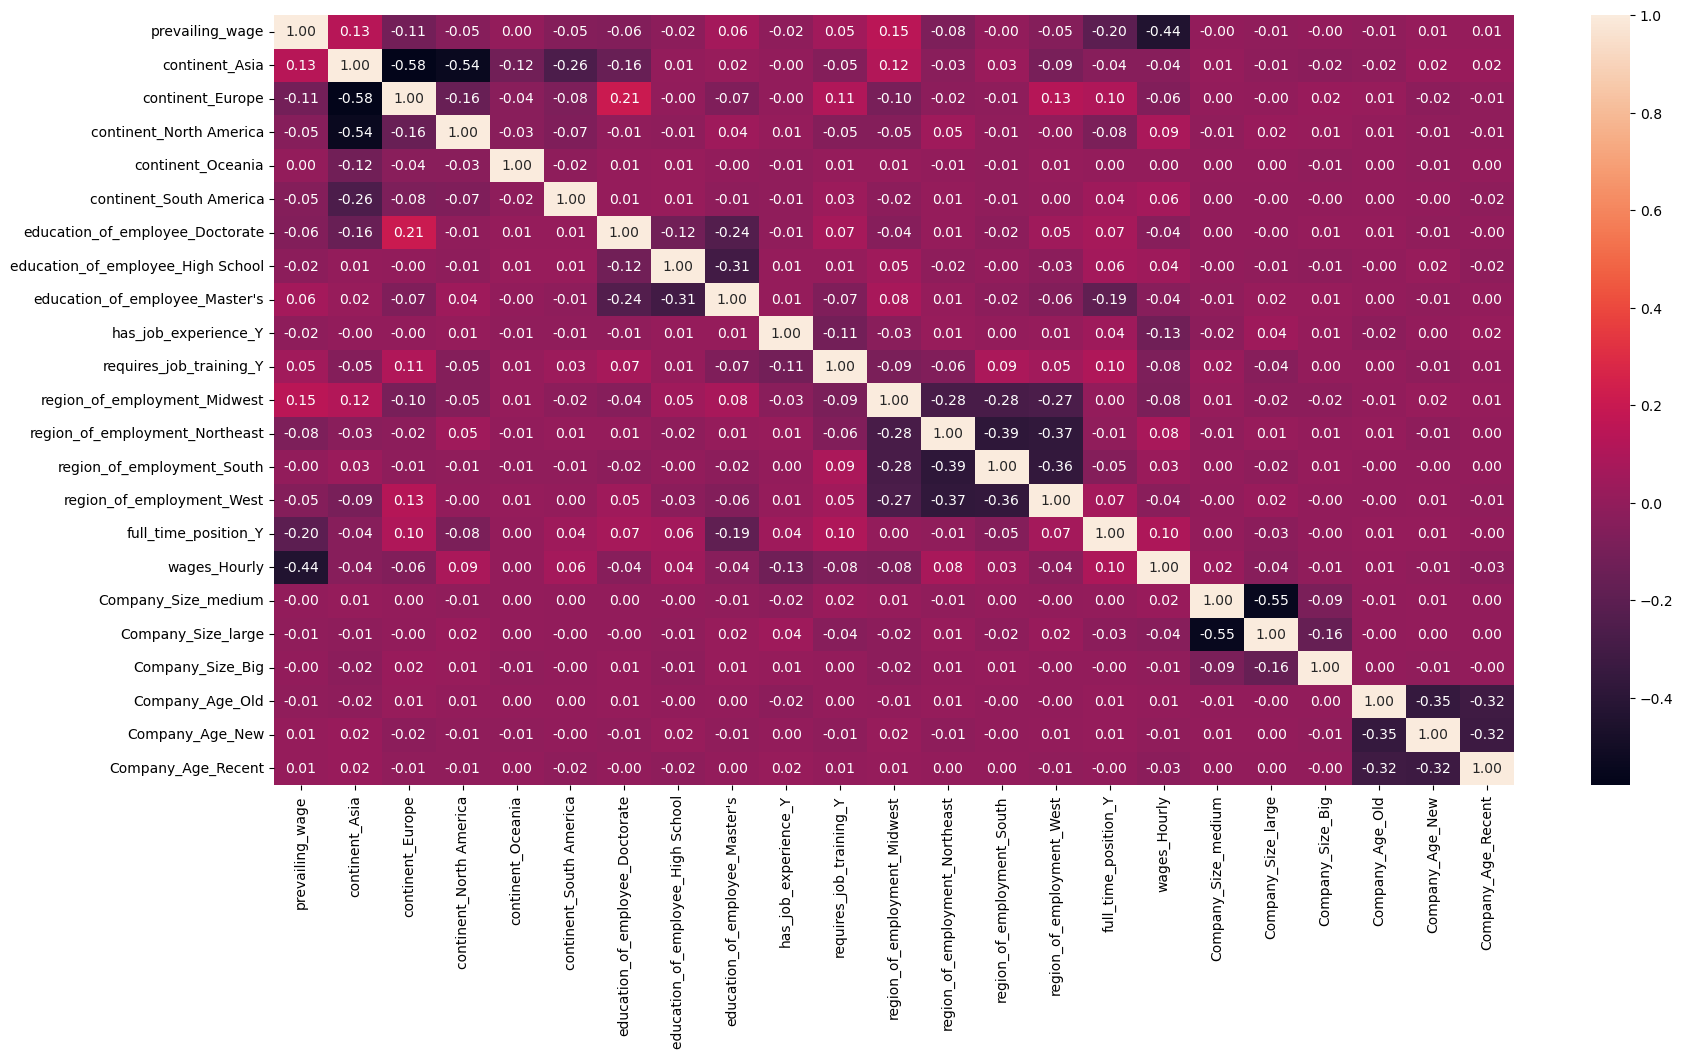

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True, fmt='.2f')

**Observations**:
    
1. Most of independent variables have very low correlation with each other.
2. There is .44 correlation in prevailing_wages with wages_Hourly.
3. There is obviously high correlation of corresponding dummy variables which originated from same independent categorical variable.


### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

In [83]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [84]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

In [81]:
# building a decision tree using the dtclassifier function
dec_Tree = DecisionTreeClassifier(criterion = 'gini', random_state=1, class_weight='balanced')
dec_Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

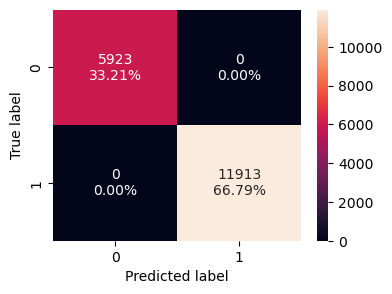

In [85]:
confusion_matrix_sklearn(dec_Tree, X_train, y_train)

In [86]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dec_Tree, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

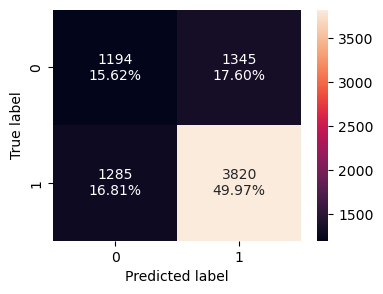

In [87]:
confusion_matrix_sklearn(dec_Tree, X_test, y_test)

In [88]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dec_Tree, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.655939,0.748286,0.739593,0.743914


**Observation**:
    
1. The decision tree overfitting the training data with all values as 1 for accuracy, recall, precision and f1.
2. The accuracy is lowest .65 on test data
3. The recall, precision and f1 are around .74 for test data.

#### Will tuning the hyperparameters improve the model performance?

### Hyperparameter Tuning - Decision Tree

In [89]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(5,30,5),
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 4, 6],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking model performance on training set

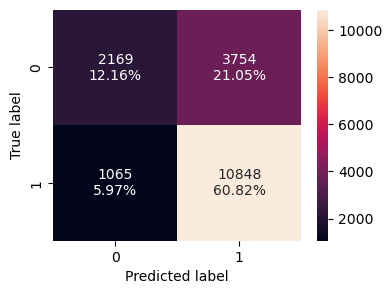

In [90]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [91]:
dtree_estimator_model_train= model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
dtree_estimator_model_train

,Accuracy,Recall,Precision,F1
0,0.729816,0.910602,0.742912,0.818254


#### Checking model performance on test set

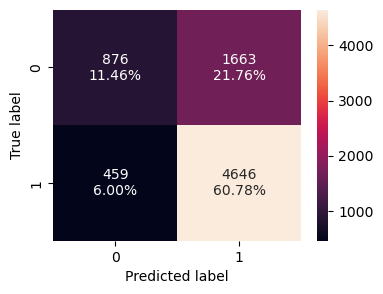

In [92]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [93]:
dtree_estimator_model_test = model_performance_classification_sklearn(
    dec_Tree, X_test, y_test
)
dtree_estimator_model_test

,Accuracy,Recall,Precision,F1
0,0.655939,0.748286,0.739593,0.743914


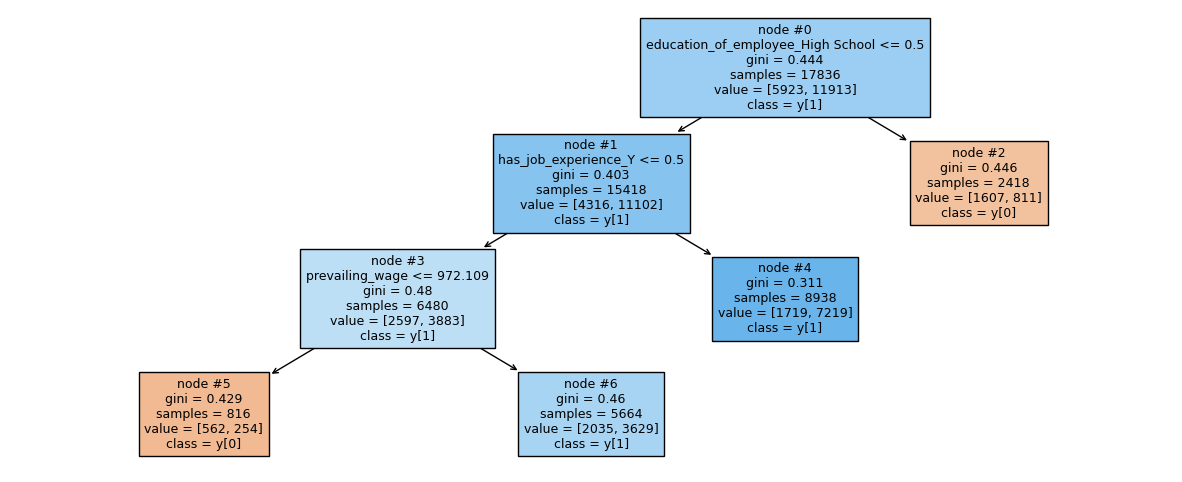

In [187]:
#plotting the decision tree
plt.figure(figsize=(15,6))
tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

**Observation**:
    
1. The hypertuned decision tree is not much overfitting on training data with accuracy of .72, recall of .91, and f1 of .81.
2. The accuracy is low .65 for test data just like full decision tree.
3. The recall, precision and f1 are around .74 for test data again.
4. As perfromance on testing and training data is quite similar this is better model than decision tree.
5. The 7 node deicison tree is quite easy to use to sort the applications for approval or denial.

## *Building bagging and boosting models*

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [94]:
#Train the Bagging classifier
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

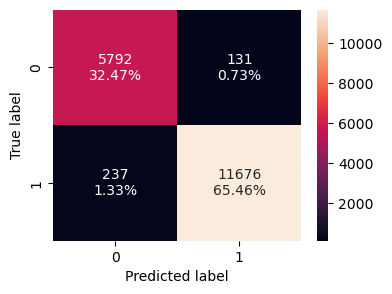

In [95]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [96]:
bagging_model_train = model_performance_classification_sklearn(bagging, X_train, y_train)
bagging_model_train

,Accuracy,Recall,Precision,F1
0,0.979368,0.980106,0.988905,0.984486


#### Checking model performance on test set

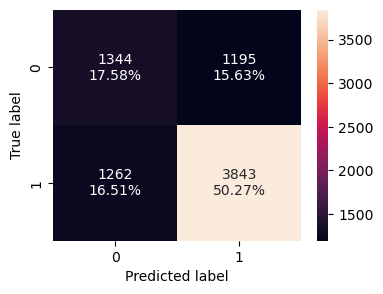

In [97]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [98]:
bagging_model_test= model_performance_classification_sklearn(bagging, 
                                                             X_test, y_test)
bagging_model_test

,Accuracy,Recall,Precision,F1
0,0.678571,0.752791,0.762803,0.757764


**Observation**:
    
1. The bagging is overfitting the training data with all values as .98 for accuracy, recall, precision and f1.
2. The accuracy is low at .67 for test data but slightly improved from previous models.
3. The recall is .75  precision and f1 are around .76 for test data, slightly improved from decision tree model.

####  Will tuning the hyperparameters improve this model performance?

### Hyperparameter Tuning - Bagging Classifier

In [99]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              "n_estimators": np.arange(90, 111, 10),

             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

#### Checking model performance on training set

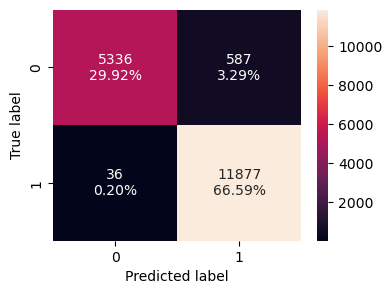

In [100]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [101]:
bagging_estimator_tuned_train = model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train)
bagging_estimator_tuned_train

,Accuracy,Recall,Precision,F1
0,0.965071,0.996978,0.952904,0.974443


#### Checking model performance on test set

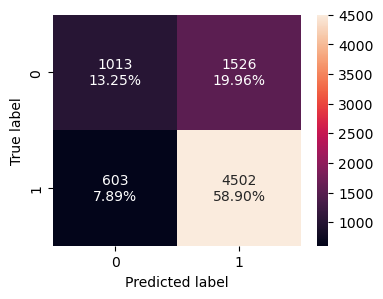

In [102]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [103]:
bagging_estimator_tuned_test= model_performance_classification_sklearn(bagging_estimator_tuned, X_test,y_test)
bagging_estimator_tuned_test


,Accuracy,Recall,Precision,F1
0,0.721481,0.881881,0.746848,0.808767


Observation:

1. The bagging_estimator_tuned is still overfitting the training data with .96 for accuracy, .99 for recall, .95 for precision and .97 for f1.
2. The accuracy has quite improved to .72 for test data from previous models.
3. The recall is .88 precision is at.74 and f1 score most important metric for this case is improved to .80. 
4. The difference between training and test data is still high and training data is too overfit even for this hypertuned bagging model.
5. The hypertuning bagging model has improved the f1 score to .80 therefore is better model than all previous model.

### Random Forest

In [104]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

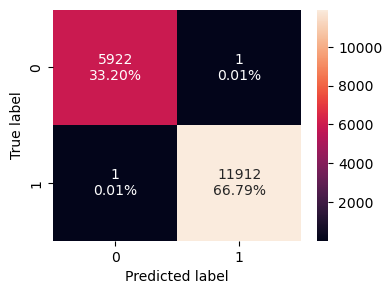

In [105]:
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [106]:
rf_estimator_model_train = model_performance_classification_sklearn(rf_estimator, X_train,y_train)
rf_estimator_model_train

,Accuracy,Recall,Precision,F1
0,0.999888,0.999916,0.999916,0.999916


#### Checking model performance on test set

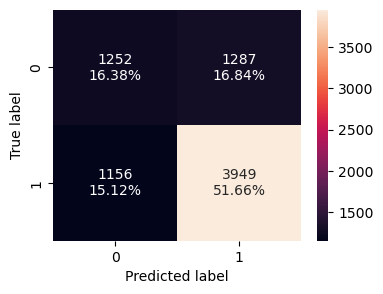

In [107]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [108]:
rf_estimator_model_test =model_performance_classification_sklearn(rf_estimator, X_test,y_test)
rf_estimator_model_test

,Accuracy,Recall,Precision,F1
0,0.680403,0.773555,0.754202,0.763756


Observation:

1. The random forest is overfitting the training data with all values as .99 for accuracy, recall, precision and f1.
2. The accuracy is lower at .68 for test data and reduced from previous model.
3. The recall is .77 , precision is .75 and f1 score is .763 for the test data.
4. The model performance similar to bagging classifier model.

####  Will tuning the hyperparameters improve this model performance?

### Hyperparameter Tuning - Random Forest

In [115]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# Grid of parameters to choose from
parameters = {  
        "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=3,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

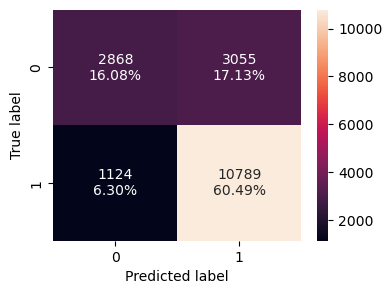

In [116]:
confusion_matrix_sklearn(rf_estimator_tuned, X_train,y_train)

In [117]:
rf_estimator_tuned_train = model_performance_classification_sklearn(rf_estimator_tuned, X_train,y_train)
rf_estimator_tuned_train

,Accuracy,Recall,Precision,F1
0,0.765699,0.905649,0.779327,0.837753


#### Checking model performance on test set

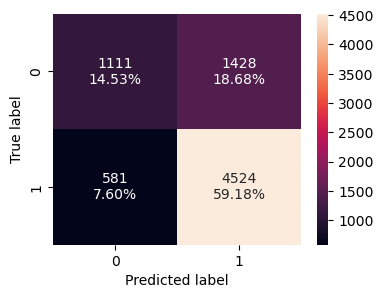

In [118]:
confusion_matrix_sklearn(rf_estimator_tuned,  X_test,y_test)

In [119]:
rf_estimator_tuned_test = model_performance_classification_sklearn(rf_estimator_tuned, X_test,y_test)
rf_estimator_tuned_test

,Accuracy,Recall,Precision,F1
0,0.737179,0.88619,0.760081,0.818305


**Observation**:

1. The rf_estimator_tuned has reduced overfitting of the training data with .76 for accuracy, .90 for recall, .78 for precision and .83 for f1.
2. The accuracy has improved to .73 for test data, and therefore training and testing data performing similar on accuracy.
3. The recall is improved to .88 precision is at.76 and f1 score most important metric for this case is improved to .82.
4. The model performed quite close on training and testing data for all the metrics. 
5. This is quite good model and definately improved from random forest classifier.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [109]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

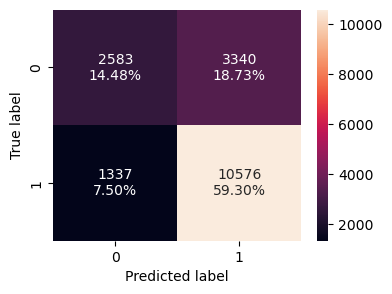

In [110]:
confusion_matrix_sklearn(ab_classifier, X_train,y_train)

In [111]:
ab_classifier_model_train = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train

,Accuracy,Recall,Precision,F1
0,0.737778,0.88777,0.759989,0.818924


#### Checking model performance on test set

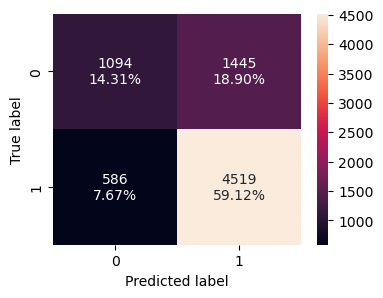

In [112]:
confusion_matrix_sklearn(ab_classifier, X_test,y_test)

In [113]:
ab_classifier_model_test = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test

,Accuracy,Recall,Precision,F1
0,0.734301,0.885211,0.757713,0.816515


**Observation**:

1. The ab_classifier_model is not at all overfitting the training data with .73 for accuracy, .88 for recall, .76 for precision and .82 for f1.
2. The accuracy has improved to .73 for test data and quite close to training data.
3. The recall is improved to .88 precision is at.75 and f1 score most important metric for this case is improved to .81.
4. This ab_classifier has improved the f1 score to .81 with similar performance on test and training data.
5. The performance of this model is quite close on all metrics for training and testing data.

####  Will tuning the hyperparameters improve the model performance?

### Hyperparameter Tuning - AdaBoost Classifier

In [131]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(80,101,10),
    "learning_rate":np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=90, random_state=1)

#### Checking model performance on training set

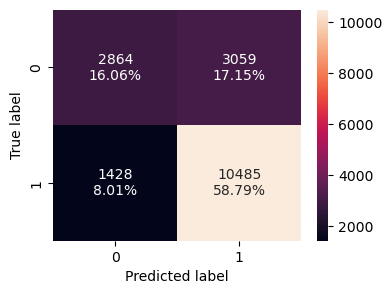

In [132]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [133]:
abc_tuned_model_train=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train


,Accuracy,Recall,Precision,F1
0,0.74843,0.880131,0.774144,0.823742


#### Checking model performance on test set

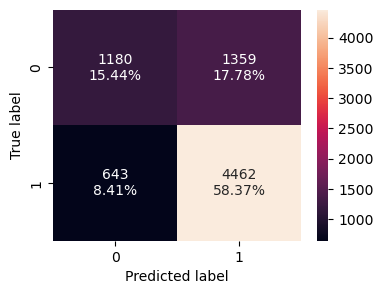

In [134]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [136]:

abc_tuned_model_test=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test

,Accuracy,Recall,Precision,F1
0,0.738095,0.874045,0.766535,0.816767


**Observation**:

1. The abc_tuned_model is not at all overfitting the training data with .74 for accuracy, .88 for recall, .77 for precision and 
 .82 for f1.
2. The accuracy has improved to .74 for test data and quite close to training data.
3. The recall is improved to .87 precision is at.76 and f1 score is improved to .81.
4. This ab_tuned_model  has improved the f1 score to .81 with similar performance on test and training data.
5. The performance of this model is quite similar to ab_classifier.

### Gradient Boosting Classifier

In [123]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

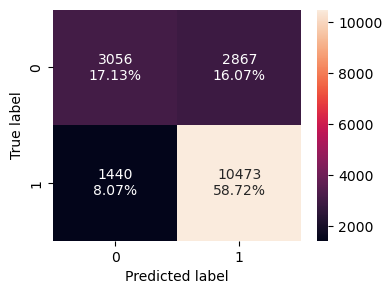

In [124]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gb_classifier, X_train,y_train)

In [125]:
gbc_classifier_model_train = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gbc_classifier_model_train

,Accuracy,Recall,Precision,F1
0,0.758522,0.879124,0.785082,0.829446


#### Checking model performance on test set

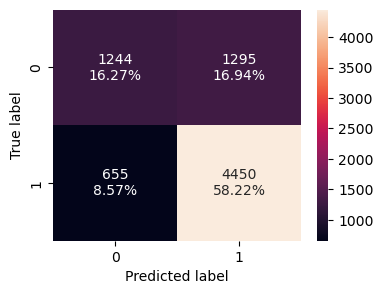

In [126]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gb_classifier, X_test,y_test)

In [1]:
gbc_classifier_model_test = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gbc_classifier_model_test

NameError: name 'model_performance_classification_sklearn' is not defined

**Observation**:

1. The gbc_classifier_model is not overfitting the training data with .75 for accuracy, .88 for recall, .78 for precision and .83 for f1.
2. The accuracy is .74 for test data which quite close to training data.
3. The recall is improved to .87, precision is at.77 and f1 score is .82.
4. This gbc_classifier has improved the f1 score to .82 with similar performance on test and training data.
5. The performance of this model is quite good while performing similar on all metrics for training and testing data.

####  Will tuning the hyperparameters improve the model performance?

### Hyperparameter Tuning - Gradient Boosting Classifier

In [138]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

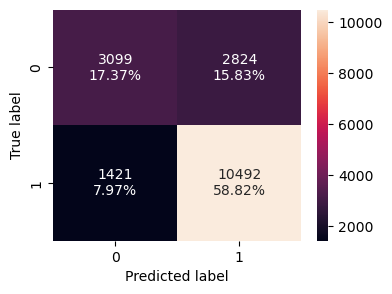

In [167]:
confusion_matrix_sklearn(gb_tuned, X_train,y_train)

In [141]:
gb_tuned_model_train=model_performance_classification_sklearn(gb_tuned,X_train,y_train)
gb_tuned_model_train

,Accuracy,Recall,Precision,F1
0,0.761998,0.880719,0.787924,0.831741


#### Checking model performance on test set

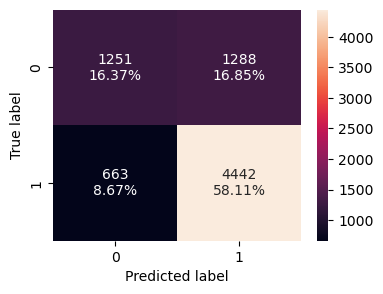

In [142]:
confusion_matrix_sklearn(gb_tuned, X_test,y_test)

In [143]:
gb_tuned_model_test = model_performance_classification_sklearn(gb_tuned,X_test,y_test)
gb_tuned_model_test


,Accuracy,Recall,Precision,F1
0,0.744767,0.870127,0.775218,0.819935


**Observation**:

1. The gb_tuned_model is not overfitting the training data with .76 for accuracy, .88 for recall, .79 for precision and .83 for f1.
2. The accuracy is .74 for test data which quite close to training data.
3. The recall is improved to .87, precision is at.78 and f1 score is .82.
4. This model has f1 score of .82 with similar performance on test and training data.
5. The performance of gb_tuned_model is quite similar to gbc_classifier but changing hypertune parameters can lead to better
performing model.

### XGBoost Classifier

In [145]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

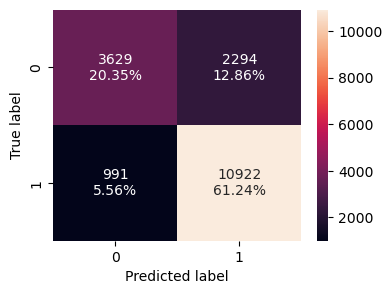

In [146]:
confusion_matrix_sklearn(xgb, X_train,y_train)

In [147]:
xgb_classifier_model_train = model_performance_classification_sklearn(xgb,X_train,y_train)
xgb_classifier_model_train

,Accuracy,Recall,Precision,F1
0,0.815822,0.916814,0.826423,0.869275


#### Checking model performance on test set

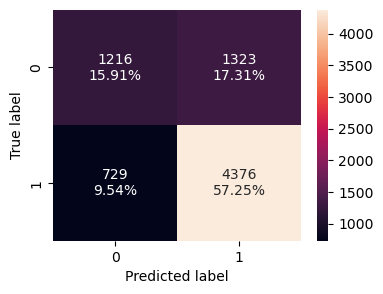

In [148]:
confusion_matrix_sklearn(xgb, X_test,y_test)

In [149]:
xgb_classifier_model_test = model_performance_classification_sklearn(xgb, X_test,y_test)
xgb_classifier_model_test

,Accuracy,Recall,Precision,F1
0,0.731554,0.857199,0.767854,0.81007


**Observation**:

1. The xgb_classifier_model is slightly overfitting the training data with .81 for accuracy, .91 for recall, .83 for precision
 and .87 for f1.
2. The accuracy is reduced to .73 for test data and quite lower than training data.
3. The recall is reduced to .85, precision is at.76 and f1 score is .81.
4. The performance of this model is not quite good as compared to previous models.

####  Will tuning the hyperparameters improve the model performance?

### Hyperparameter Tuning - XGBoost Classifier

In [150]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

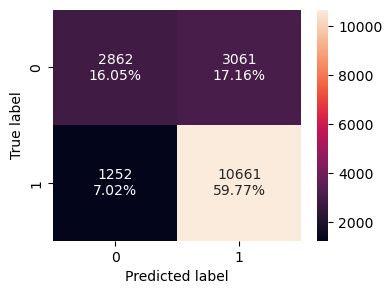

In [151]:
confusion_matrix_sklearn(xgb_tuned,X_train, y_train)

In [152]:
xgb_tuned_model_train = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train

,Accuracy,Recall,Precision,F1
0,0.758186,0.894905,0.776928,0.831753


#### Checking model performance on test set

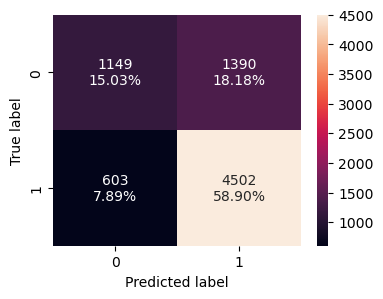

In [153]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [154]:

xgb_tuned_model_test= model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_test


,Accuracy,Recall,Precision,F1
0,0.739273,0.881881,0.764087,0.818769


**Observation**:

1. The xgb_tuned_model is not overfitting the training data with .76 for accuracy, .89 for recall, .77 for precision and 
.83 for f1.
2. The accuracy is .74 for test data and quite close to training data.
3. The recall is .88, precision is at.76 and f1 score is .82.
4. The performance of this model is quite good while performing similar on all metrics for training and testing data.

## Stacking Classifier

In [157]:
estimators =  [("AdaBoost", ab_classifier),
    ("Gradient Boosting", gb_tuned),
    ("Decision tree", dtree_estimator),]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision tree',
                                DecisionTreeClassifier(max_depth=5,
                                                       max_leaf_nodes=4,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=3,
                                                       random_state=1))],
                   final_estimator=XGBClassifi...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=10, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

#### Checking model performance on training set

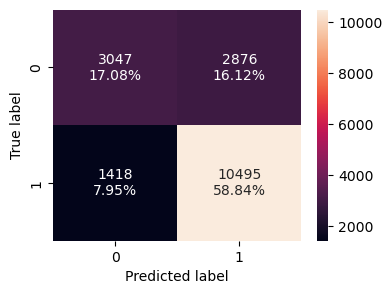

In [166]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [162]:
stacking_classifier_model_train = model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train

,Accuracy,Recall,Precision,F1
0,0.759251,0.88097,0.784908,0.830169


#### Checking model performance on test set

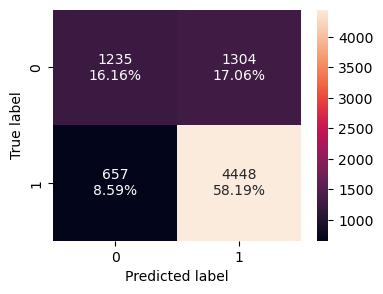

In [165]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [163]:
stacking_classifier_model_test=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


**Observation**:

1. The stacking_classifier_model is not at all  overfitting the training data with .76 for accuracy, .88 for recall,
.78 for precision and .83 for f1.
2. The accuracy is .74 for test data which quite close to training data.
3. The recall is .87, precision is at.77 and f1 score is .82.
4. This stacking_classifier has improved the f1 score to .82 with similar performance on test and training data.
5. The performance of this model is quite good while performing similar on all metrics for training and testing data.

## Model Performance Comparison and Conclusions

### Comparing model performances of training set

In [176]:
# training performance comparison

Models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train.T,
        bagging_model_train.T,
        bagging_estimator_tuned_train.T,
        rf_estimator_model_train.T,
        rf_estimator_tuned_train.T,
        ab_classifier_model_train.T,
        abc_tuned_model_train.T,
        gbc_classifier_model_train.T,
        gb_tuned_model_train.T,
        xgb_classifier_model_train.T,
        xgb_tuned_model_train.T,
        stacking_classifier_model_train.T,
    ],
    axis=1,
)
Models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
Models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.729816,0.979368,0.965071,0.999888,0.765699,0.737778,0.748430,0.758522,0.761998,0.815822,0.758186,0.759251
Recall,1.0,0.910602,0.980106,0.996978,0.999916,0.905649,0.887770,0.880131,0.879124,0.880719,0.916814,0.894905,0.880970
Precision,1.0,0.742912,0.988905,0.952904,0.999916,0.779327,0.759989,0.774144,0.785082,0.787924,0.826423,0.776928,0.784908
F1,1.0,0.818254,0.984486,0.974443,0.999916,0.837753,0.818924,0.823742,0.829446,0.831741,0.869275,0.831753,0.830169


### Comparing model performances of test set

In [177]:
# testing performance comparison

Models_test_comp_df = pd.concat(
    [
     decision_tree_perf_test.T,
     dtree_estimator_model_test.T,
     bagging_model_test.T,
     bagging_estimator_tuned_test.T,
     rf_estimator_model_test.T,
     rf_estimator_tuned_test.T,
     ab_classifier_model_test.T,
     abc_tuned_model_test.T,
     gbc_classifier_model_test.T,
     gb_tuned_model_test.T,
     xgb_classifier_model_test.T,
     xgb_tuned_model_test.T,
     stacking_classifier_model_test.T],
      
    axis=1,
    
)

Models_test_comp_df.columns = [
    
     "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier", 
]
print("Testing performance comparison:\n")
Models_test_comp_df

Testing performance comparison:



,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.655939,0.655939,0.678571,0.721481,0.680403,0.737179,0.734301,0.738095,0.744898,0.744767,0.731554,0.739273,0.743459
Recall,0.748286,0.748286,0.752791,0.881881,0.773555,0.886190,0.885211,0.874045,0.871694,0.870127,0.857199,0.881881,0.871303
Precision,0.739593,0.739593,0.762803,0.746848,0.754202,0.760081,0.757713,0.766535,0.774587,0.775218,0.767854,0.764087,0.773296
F1,0.743914,0.743914,0.757764,0.808767,0.763756,0.818305,0.816515,0.816767,0.820276,0.819935,0.810070,0.818769,0.819379


**Observations**:
    
1. All the boosting models have performed pretty well on testing and training data.
2. The hypertuned bagging classifier and random forest performed way better than respective untuned models.
3. Though most pf the boosting algorithams have performed quite well, I will use gbc_classifier_model as final model.
4. The gbc_classifer_model did not overfit the training data with accuracy of .75, recall - .88,  precision - .78  and f1 - .83.
5. For testing data, accuracy - .745, recall - .87, precision - .77 and f1 - .82
6. The performance of this model on testing set  is very close the training set on all the metrics.
7. This gbc_classifier has f1 score to .82 with similar performance on test and training data.
8. The performance of this model is quite good and is less cumputational extensive as compared tunes gradient boost or XGBoost.

### Important features of the final model

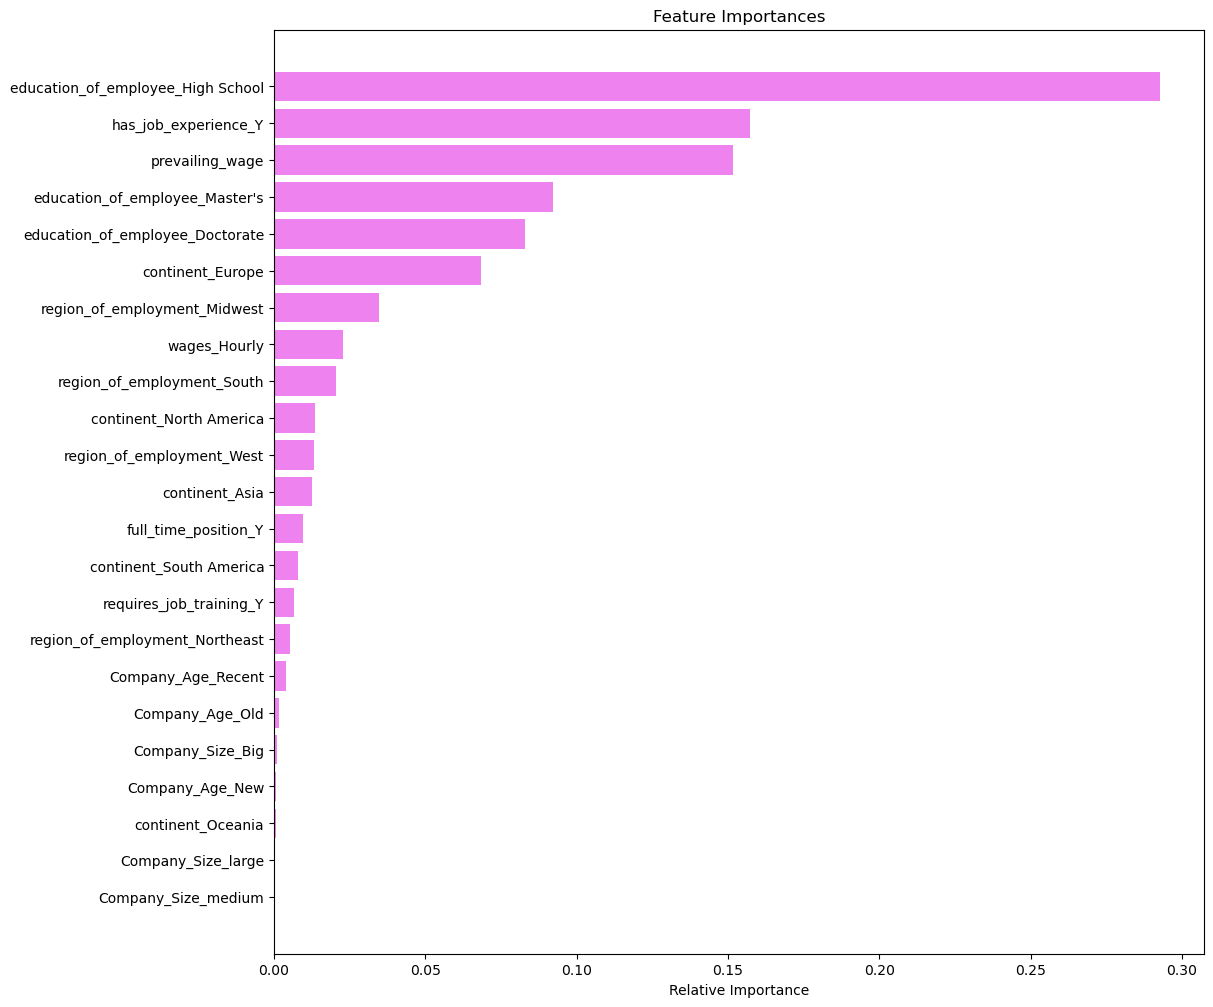

In [179]:
#plot the important features of final model
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

1. Various education level are some of the important features in the model. The high school certification as
highest education level seems to be most dominating feature of the model.
2. The 2nd important feature is job experience and chances of approval increases to 75% from 66% with applicant's prior
job experience.
3. The prevailing wages specially hourly wages do have quite impact on certification rate of application.


## Actionable Insights and Recommendations